# MLP trained on the Fashion-MNIST dataset using Tensorflow

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

from matplotlib import pyplot as plt
import datetime

%load_ext tensorboard

## Load Fashion-MNIST

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Plot some examples

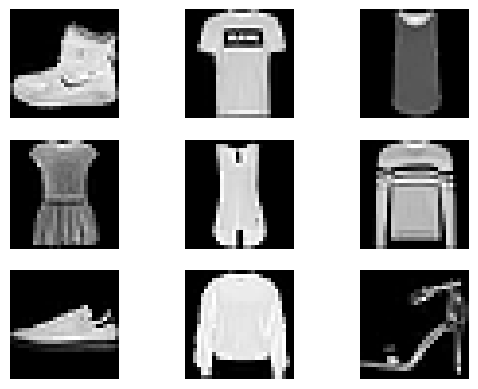

In [4]:
i = 0

for picture in x_train[:9]:
    plt.subplot(3, 3, i+1)
    plt.imshow(picture, cmap='gray')
    plt.axis('off')
    i = i + 1

plt.show()

## Create MLP

In [5]:
mlp = Sequential([
    Rescaling(scale=1./255, input_shape=(28, 28)),
    Flatten(),
    
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    
    Dense(10, activation='softmax')
])

## Compile model

In [6]:
mlp.compile(
    optimizer=SGD(learning_rate=0.001),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

## Define early stopping and TensorBoard callback

In [7]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    mode='min', 
    verbose=1,
    patience=5,
    restore_best_weights=True
)

log_dir = "../logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1)

## Train model

In [8]:
history = mlp.fit(
    x_train,
    y_train,
    epochs=250,
    validation_split=0.2,
    batch_size=128,
    shuffle=True,
    callbacks=[tensorboard, early_stopping]
)

Epoch 1/250
375/375 [==============================] - 6s 15ms/step - loss: 2.1339 - accuracy: 0.3164 - val_loss: 1.9475 - val_accuracy: 0.5631
Epoch 2/250
375/375 [==============================] - 5s 14ms/step - loss: 1.7667 - accuracy: 0.6112 - val_loss: 1.5696 - val_accuracy: 0.6442
Epoch 3/250
375/375 [==============================] - 4s 11ms/step - loss: 1.4012 - accuracy: 0.6513 - val_loss: 1.2379 - val_accuracy: 0.6653
Epoch 4/250
375/375 [==============================] - 4s 11ms/step - loss: 1.1346 - accuracy: 0.6691 - val_loss: 1.0338 - val_accuracy: 0.6872
Epoch 5/250
375/375 [==============================] - 4s 11ms/step - loss: 0.9760 - accuracy: 0.6916 - val_loss: 0.9134 - val_accuracy: 0.7072
Epoch 6/250
375/375 [==============================] - 4s 12ms/step - loss: 0.8807 - accuracy: 0.7086 - val_loss: 0.8385 - val_accuracy: 0.7207
Epoch 7/250
375/375 [==============================] - 5s 15ms/step - loss: 0.8179 - accuracy: 0.7233 - val_loss: 0.7863 - val_accuracy:

375/375 [==============================] - 5s 12ms/step - loss: 0.4263 - accuracy: 0.8526 - val_loss: 0.4403 - val_accuracy: 0.8449
Epoch 58/250
375/375 [==============================] - 4s 12ms/step - loss: 0.4244 - accuracy: 0.8534 - val_loss: 0.4372 - val_accuracy: 0.8478
Epoch 59/250
375/375 [==============================] - 4s 12ms/step - loss: 0.4232 - accuracy: 0.8543 - val_loss: 0.4354 - val_accuracy: 0.8492
Epoch 60/250
375/375 [==============================] - 4s 11ms/step - loss: 0.4214 - accuracy: 0.8534 - val_loss: 0.4343 - val_accuracy: 0.8470
Epoch 61/250
375/375 [==============================] - 4s 11ms/step - loss: 0.4199 - accuracy: 0.8537 - val_loss: 0.4351 - val_accuracy: 0.8479
Epoch 62/250
375/375 [==============================] - 4s 12ms/step - loss: 0.4181 - accuracy: 0.8550 - val_loss: 0.4323 - val_accuracy: 0.8507
Epoch 63/250
375/375 [==============================] - 4s 11ms/step - loss: 0.4164 - accuracy: 0.8562 - val_loss: 0.4357 - val_accuracy: 0.846

375/375 [==============================] - 5s 14ms/step - loss: 0.3622 - accuracy: 0.8740 - val_loss: 0.3867 - val_accuracy: 0.8676
Epoch 114/250
375/375 [==============================] - 5s 12ms/step - loss: 0.3620 - accuracy: 0.8748 - val_loss: 0.3879 - val_accuracy: 0.8659
Epoch 115/250
375/375 [==============================] - 4s 12ms/step - loss: 0.3604 - accuracy: 0.8747 - val_loss: 0.3862 - val_accuracy: 0.8658
Epoch 116/250
375/375 [==============================] - 5s 12ms/step - loss: 0.3597 - accuracy: 0.8756 - val_loss: 0.3857 - val_accuracy: 0.8669
Epoch 117/250
375/375 [==============================] - 5s 12ms/step - loss: 0.3589 - accuracy: 0.8754 - val_loss: 0.3842 - val_accuracy: 0.8684
Epoch 118/250
375/375 [==============================] - 5s 12ms/step - loss: 0.3581 - accuracy: 0.8760 - val_loss: 0.3828 - val_accuracy: 0.8685
Epoch 119/250
375/375 [==============================] - 5s 14ms/step - loss: 0.3574 - accuracy: 0.8755 - val_loss: 0.3832 - val_accuracy:

375/375 [==============================] - 5s 13ms/step - loss: 0.3239 - accuracy: 0.8865 - val_loss: 0.3607 - val_accuracy: 0.8748
Epoch 170/250
375/375 [==============================] - 5s 12ms/step - loss: 0.3236 - accuracy: 0.8862 - val_loss: 0.3594 - val_accuracy: 0.8763
Epoch 171/250
375/375 [==============================] - 5s 13ms/step - loss: 0.3224 - accuracy: 0.8876 - val_loss: 0.3608 - val_accuracy: 0.8760
Epoch 172/250
375/375 [==============================] - 5s 13ms/step - loss: 0.3222 - accuracy: 0.8872 - val_loss: 0.3653 - val_accuracy: 0.8718
Epoch 173/250
375/375 [==============================] - 6s 17ms/step - loss: 0.3212 - accuracy: 0.8871 - val_loss: 0.3589 - val_accuracy: 0.8767
Epoch 174/250
375/375 [==============================] - 7s 17ms/step - loss: 0.3201 - accuracy: 0.8874 - val_loss: 0.3589 - val_accuracy: 0.8767
Epoch 175/250
375/375 [==============================] - 6s 15ms/step - loss: 0.3204 - accuracy: 0.8868 - val_loss: 0.3575 - val_accuracy:

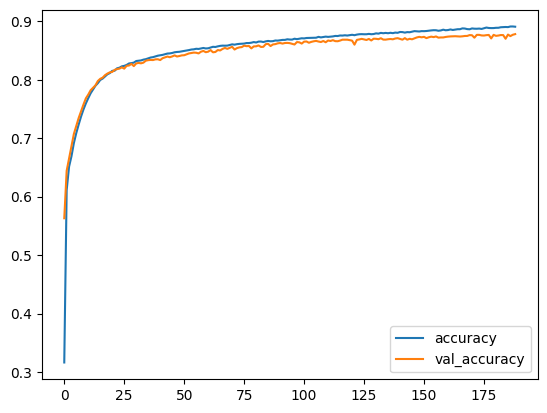

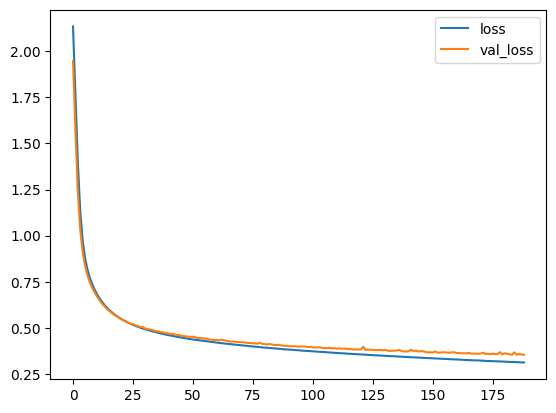

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

## Evaluate model

In [10]:
mlp.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3768 - accuracy: 0.8665


[0.3767729699611664, 0.8665000200271606]